In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


In [2]:
# Read in file
happiness_df = pd.read_csv('world-happiness-report-2015-2022-cleaned.csv')
happiness_df


,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1224,141,142,Botswana*,-,"3,471","1,503","0,815","0,280","0,571","0,102","0,012",2022
1225,142,143,Rwanda*,-,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022
1226,143,144,Zimbabwe,Sub-Saharan Africa,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022
1227,144,145,Lebanon,Middle East and Northern Africa,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022


In [3]:
# Removing all regions marked with no value "-"  -Tye
happiness_df.drop(
    happiness_df[happiness_df['Region'] == "-"].index, inplace=True)


In [4]:
# Converting Happiness Score to Float as some data contains (,) versus (.) as a decimal.-Tye
happiness_df["Happiness Score"] = happiness_df["Happiness Score"].str.replace(
    ',', '.').astype(float)


In [5]:
happiness_df.dtypes


Unnamed: 0                         int64
Happiness Rank                     int64
Country                           object
Region                            object
Happiness Score                  float64
Economy (GDP per Capita)          object
Family (Social Support)           object
Health (Life Expectancy)          object
Freedom                           object
Trust (Government Corruption)     object
Generosity                        object
Year                               int64
dtype: object

In [6]:
# complete data cleaning steps

happiness_df.count()


Unnamed: 0                       1183
Happiness Rank                   1183
Country                          1183
Region                           1183
Happiness Score                  1183
Economy (GDP per Capita)         1183
Family (Social Support)          1183
Health (Life Expectancy)         1183
Freedom                          1183
Trust (Government Corruption)    1183
Generosity                       1183
Year                             1183
dtype: int64

In [7]:
# Unique Number of countries in our data -Tye
total_countries = len(happiness_df['Country'].unique())
print(f'Number of total countries in the data set: {total_countries}')


Number of total countries in the data set: 169


In [8]:
# Unique Number of countries in our data -Tye
total_Regions = len(happiness_df['Region'].unique())
print(f'Number of total countries in the data set: {total_Regions}')


Number of total countries in the data set: 16


In [9]:
# Unique Values by column -Tye
happiness_df.nunique()


Unnamed: 0                        158
Happiness Rank                    158
Country                           169
Region                             16
Happiness Score                  1062
Economy (GDP per Capita)         1115
Family (Social Support)          1092
Health (Life Expectancy)         1040
Freedom                          1018
Trust (Government Corruption)     923
Generosity                        951
Year                                8
dtype: int64

**Understanding the Data:**
Our date consists of 195 countries, 17 regions, and over the course of 8 years. We need to be careful with this data as we can see that all factors being tested for happiness are not equal. This means most likely some countries were not able to be evaluated by one of the variables of happiness, or as we have seen in our data that 2015 data was stored using "." in the data, while more recent years (2022) use "," to configure theirt data. This returns a higher unique number in these columns.
-Tye

In [10]:
# Region Names -Tye
Region_Names = happiness_df.Region.unique()
print(Region_Names)


['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia' 'North America and ANZ'
 'Middle East and North Africa' 'East Asia' 'Southeast Asia'
 'Commonwealth of Independent States' 'South Asia']


In [11]:
Region = happiness_df.set_index(["Region"]).groupby(["Region"])
Region


In [12]:
# Data Frame created to analyse year over year Happiness Rank by Region
rank_2015 = happiness_df[happiness_df['Year'] == 2015].groupby(
    happiness_df.Region).mean()["Happiness Rank"]
rank_2016 = happiness_df[happiness_df["Year"] == 2016].groupby(
    happiness_df.Region).mean()["Happiness Rank"]
rank_2017 = happiness_df[happiness_df["Year"] == 2017].groupby(
    happiness_df.Region).mean()["Happiness Rank"]
rank_2018 = happiness_df[happiness_df["Year"] == 2018].groupby(
    happiness_df.Region).mean()["Happiness Rank"]
rank_2019 = happiness_df[happiness_df["Year"] == 2019].groupby(
    happiness_df.Region).mean()["Happiness Rank"]
rank_2020 = happiness_df[happiness_df["Year"] == 2020].groupby(
    happiness_df.Region).mean()["Happiness Rank"]
rank_2021 = happiness_df[happiness_df["Year"] == 2021].groupby(
    happiness_df.Region).mean()["Happiness Rank"]
rank_2022 = happiness_df[happiness_df["Year"] == 2022].groupby(
    happiness_df.Region).mean()["Happiness Rank"]
Region_by_year_mean = pd.DataFrame({"2015": rank_2015, "2016": rank_2016,
                                    "2017": rank_2017, "2018": rank_2018, "2019": rank_2019, "2020": rank_2020, "2021": rank_2021, "2022": rank_2022})
Region_by_year_mean.index.name = "Region"


Region_by_year_mean[["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]] = Region_by_year_mean[[
    "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]].applymap("{:.2f}".format)

Region_by_year_mean


C:\Users\laphe\AppData\Local\Temp\ipykernel_3404\2147208406.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  happiness_df.Region).mean()["Happiness Rank"]
C:\Users\laphe\AppData\Local\Temp\ipykernel_3404\2147208406.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  happiness_df.Region).mean()["Happiness Rank"]
C:\Users\laphe\AppData\Local\Temp\ipykernel_3404\2147208406.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the funct

,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,
Australia and New Zealand,9.50,8.50,9.00,9.00,9.50,nan,nan,11.00
Central and Eastern Europe,79.00,78.45,75.07,74.97,70.50,58.29,53.24,58.42
Commonwealth of Independent States,nan,nan,nan,nan,nan,82.58,78.25,nan
East Asia,nan,nan,nan,nan,nan,66.83,62.17,nan
Eastern Asia,64.50,67.17,71.25,65.50,64.83,nan,nan,63.25
Latin America and Caribbean,46.91,48.33,50.81,51.25,52.00,52.38,56.65,56.89
Middle East and North Africa,nan,nan,nan,nan,nan,89.12,90.00,nan
Middle East and Northern Africa,77.60,78.11,76.42,84.28,84.89,nan,nan,87.08
North America,10.00,9.50,10.50,12.50,14.00,nan,nan,15.50


**Note:** Year over year mean rank by region (2015-2022)
Western Europe & Australia/New Zealand consistantly rank among the happiest regions in the world through the data time (2015-2022). Follwoing the beginning of the Covid-19 Pandemic Western Europe has consistantly been the happiest region, as Southern Asia is amongst the worst with a median 118.0 rank out of 169 countries evaluated. -Tye

In [13]:
# DataFrame Analysing the median Happiness Score by world region -Tye
score_2015 = happiness_df[happiness_df['Year'] == 2015].groupby(
    happiness_df.Region).mean()["Happiness Score"]
score_2016 = happiness_df[happiness_df["Year"] == 2016].groupby(
    happiness_df.Region).mean()["Happiness Score"]
score_2017 = happiness_df[happiness_df["Year"] == 2017].groupby(
    happiness_df.Region).mean()["Happiness Score"]
score_2018 = happiness_df[happiness_df["Year"] == 2018].groupby(
    happiness_df.Region).mean()["Happiness Score"]
score_2019 = happiness_df[happiness_df["Year"] == 2019].groupby(
    happiness_df.Region).mean()["Happiness Score"]
score_2020 = happiness_df[happiness_df["Year"] == 2020].groupby(
    happiness_df.Region).mean()["Happiness Score"]
score_2021 = happiness_df[happiness_df["Year"] == 2021].groupby(
    happiness_df.Region).mean()["Happiness Score"]
score_2022 = happiness_df[happiness_df["Year"] == 2022].groupby(
    happiness_df.Region).mean()["Happiness Score"]
region_score_by_year_mean = pd.DataFrame({"2015": score_2015, "2016": score_2016,
                                          "2017": score_2017, "2018": score_2018, "2019": score_2019, "2020": score_2020, "2021": score_2021, "2022": score_2022})
region_score_by_year_mean.index.name = "Region"


region_score_by_year_mean[["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]] = region_score_by_year_mean[[
    "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]].applymap("{:.2f}".format)

region_score_by_year_mean


C:\Users\laphe\AppData\Local\Temp\ipykernel_3404\1580323756.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  happiness_df.Region).mean()["Happiness Score"]
C:\Users\laphe\AppData\Local\Temp\ipykernel_3404\1580323756.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  happiness_df.Region).mean()["Happiness Score"]
C:\Users\laphe\AppData\Local\Temp\ipykernel_3404\1580323756.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fun

,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,
Australia and New Zealand,7.29,7.32,7.30,7.30,7.27,nan,nan,7.18
Central and Eastern Europe,5.33,5.37,5.41,5.46,5.57,5.88,5.98,5.90
Commonwealth of Independent States,nan,nan,nan,nan,nan,5.36,5.47,nan
East Asia,nan,nan,nan,nan,nan,5.71,5.81,nan
Eastern Asia,5.63,5.62,5.50,5.67,5.69,nan,nan,5.83
Latin America and Caribbean,6.14,6.10,5.96,5.94,5.94,5.98,5.91,5.93
Middle East and North Africa,nan,nan,nan,nan,nan,5.23,5.22,nan
Middle East and Northern Africa,5.41,5.39,5.37,5.20,5.24,nan,nan,5.21
North America,7.27,7.25,7.15,7.11,7.08,nan,nan,7.00


The Analysis of Happiness Score shows Australia/New Zealand and Western Europe not only with the highest score, but one of the most consistant. The happiness score of North America has declined year over year since 2015, with it being the 2nd highest world region in 2022. - Tye

In [14]:
# Statistical Analysis of World Region by Happiness Rank -Tye
region_statistics_df = happiness_df.groupby('Region')
Mean = region_statistics_df['Happiness Rank'].mean()
Median = region_statistics_df['Happiness Rank'].median()
Variance = region_statistics_df['Happiness Rank'].var()
Standard_Deviation = region_statistics_df['Happiness Rank'].std()
Standard_Error_Of_Mean = region_statistics_df['Happiness Rank'].sem()

summary_statistics_df = pd.DataFrame({
    'Mean': Mean,
    'Median': Median,
    'Variance': Variance,
    'Standard deviation': Standard_Deviation,
    'SEM': Standard_Error_Of_Mean
})
# Present Summary Statistics
print('Method I')
summary_statistics_df


Method I


,Mean,Median,Variance,Standard deviation,SEM
Region,,,,,
Australia and New Zealand,9.416667,9.5,1.719697,1.311372,0.378561
Central and Eastern Europe,70.242574,67.5,737.637382,27.159481,1.910934
Commonwealth of Independent States,80.416667,75.5,564.688406,23.763173,4.850637
East Asia,64.500000,66.0,471.727273,21.719283,6.269817
Eastern Asia,65.937500,63.5,449.995968,21.213108,3.749983
Latin America and Caribbean,51.692771,45.0,830.008069,28.809861,2.236079
Middle East and North Africa,89.558824,107.5,1869.223708,43.234520,7.414659
Middle East and Northern Africa,81.018519,86.5,1759.644514,41.948117,4.036459
North America,12.000000,13.5,24.363636,4.935953,1.424887


Statistical Analysis shows the happiest region in the world is Australia/New Zealand across every statistical measure, while Sub-Saharan Africa are one of the least happy by rank. -Tye

In [17]:
# Looking at dataframe -Lauren
happiness_df


,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,138,139,Tanzania,Sub-Saharan Africa,3.702,"0,848","0,597","0,425","0,578","0,270","0,248",2022
1222,139,140,Sierra Leone,Sub-Saharan Africa,3.574,"0,686","0,416","0,273","0,387","0,055","0,202",2022
1226,143,144,Zimbabwe,Sub-Saharan Africa,2.995,"0,947","0,690","0,270","0,329","0,105","0,106",2022
1227,144,145,Lebanon,Middle East and Northern Africa,2.955,"1,392","0,498","0,631","0,103","0,034","0,082",2022


In [18]:
# Make a copy of happiness_df -Lauren
reduced_happiness_df = happiness_df.copy()
reduced_happiness_df


,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,138,139,Tanzania,Sub-Saharan Africa,3.702,"0,848","0,597","0,425","0,578","0,270","0,248",2022
1222,139,140,Sierra Leone,Sub-Saharan Africa,3.574,"0,686","0,416","0,273","0,387","0,055","0,202",2022
1226,143,144,Zimbabwe,Sub-Saharan Africa,2.995,"0,947","0,690","0,270","0,329","0,105","0,106",2022
1227,144,145,Lebanon,Middle East and Northern Africa,2.955,"1,392","0,498","0,631","0,103","0,034","0,082",2022


In [19]:
# Reduce dataframe to Country, Happiness Score and Year -Lauren
reduced_happiness_df = reduced_happiness_df[[
    "Country", "Happiness Score", "Year"]]
reduced_happiness_df


,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Canada,7.427,2015
...,...,...,...
1221,Tanzania,3.702,2022
1222,Sierra Leone,3.574,2022
1226,Zimbabwe,2.995,2022
1227,Lebanon,2.955,2022


In [20]:
# Extract data for only 2015 and put in decending order -Lauren
top_2015 = reduced_happiness_df[reduced_happiness_df['Year'] == 2015].groupby(
    reduced_happiness_df.Country).max()["Happiness Score"]
top_2015_df = top_2015.sort_values(ascending=False)

top_2015_df


Country
Switzerland    7.587
Iceland        7.561
Denmark        7.527
Norway         7.522
Canada         7.427
               ...  
Rwanda         3.465
Benin          3.340
Syria          3.006
Burundi        2.905
Togo           2.839
Name: Happiness Score, Length: 158, dtype: float64

In [21]:
# Extract first and last value of dataset -Lauren
df2015 = top_2015_df.iloc[[0, -1]]
df2015


Country
Switzerland    7.587
Togo           2.839
Name: Happiness Score, dtype: float64

In [22]:
# Reset index and convert to pandas -Lauren
df2015 = pd.DataFrame(df2015).reset_index()


In [23]:
# Add "Year" column -Lauren
df2015["Year"] = [2015, 2015]
df2015


,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Togo,2.839,2015


In [24]:
# Extract data for only 2016 and put in decending order -Lauren
top_2016 = happiness_df[happiness_df['Year'] == 2016].groupby(
    happiness_df.Country).max()["Happiness Score"]
top_2016_df = top_2016.sort_values(ascending=False)

top_2016_df


Country
Denmark        7.526
Switzerland    7.509
Iceland        7.501
Norway         7.498
Finland        7.413
               ...  
Benin          3.484
Afghanistan    3.360
Togo           3.303
Syria          3.069
Burundi        2.905
Name: Happiness Score, Length: 157, dtype: float64

In [25]:
# Extract first and last value of dataset -Lauren
df2016 = top_2016_df.iloc[[0, -1]]
df2016


Country
Denmark    7.526
Burundi    2.905
Name: Happiness Score, dtype: float64

In [26]:
# Reset index and convert to pandas -Lauren
df2016 = pd.DataFrame(df2016).reset_index()


In [27]:
# Add "Year" column -Lauren
df2016["Year"] = [2016, 2016]
df2016


,Country,Happiness Score,Year
0,Denmark,7.526,2016
1,Burundi,2.905,2016


In [28]:
# Extract data for only 2017 and put in decending order -Lauren
top_2017 = happiness_df[happiness_df['Year'] == 2017].groupby(
    happiness_df.Country).max()["Happiness Score"]
top_2017_df = top_2017.sort_values(ascending=False)

top_2017_df


Country
Norway                      7.537
Denmark                     7.522
Iceland                     7.504
Switzerland                 7.494
Finland                     7.469
                            ...  
Rwanda                      3.471
Syria                       3.462
Tanzania                    3.349
Burundi                     2.905
Central African Republic    2.693
Name: Happiness Score, Length: 149, dtype: float64

In [29]:
# Extract first and last value of dataset -Lauren
df2017 = top_2017_df.iloc[[0, -1]]
df2017


Country
Norway                      7.537
Central African Republic    2.693
Name: Happiness Score, dtype: float64

In [30]:
# Reset index and convert to pandas -Lauren
df2017 = pd.DataFrame(df2017).reset_index()


In [31]:
# Add "Year" column -Lauren
df2017["Year"] = [2017, 2017]
df2017


,Country,Happiness Score,Year
0,Norway,7.537,2017
1,Central African Republic,2.693,2017


In [32]:
# Extract data for only 2018 and put in decending order -Lauren
top_2018 = happiness_df[happiness_df['Year'] == 2018].groupby(
    happiness_df.Country).max()["Happiness Score"]
top_2018_df = top_2018.sort_values(ascending=False)

top_2018_df


Country
Finland                     7.632
Norway                      7.594
Denmark                     7.555
Iceland                     7.495
Switzerland                 7.487
                            ...  
Rwanda                      3.408
Yemen                       3.355
Tanzania                    3.303
Central African Republic    3.083
Burundi                     2.905
Name: Happiness Score, Length: 149, dtype: float64

In [33]:
# Extract first and last value of dataset -Lauren
df2018 = top_2018_df.iloc[[0, -1]]
df2018


Country
Finland    7.632
Burundi    2.905
Name: Happiness Score, dtype: float64

In [34]:
# Reset index and convert to pandas -Lauren
df2018 = pd.DataFrame(df2018).reset_index()


In [35]:
# Add "Year" column -Lauren
df2018["Year"] = [2018, 2018]
df2018


,Country,Happiness Score,Year
0,Finland,7.632,2018
1,Burundi,2.905,2018


In [36]:
# Extract data for only 2019 and put in decending order -Lauren
top_2019 = happiness_df[happiness_df['Year'] == 2019].groupby(
    happiness_df.Country).max()["Happiness Score"]
top_2019_df = top_2019.sort_values(ascending=False)

top_2019_df


Country
Finland                     7.769
Denmark                     7.600
Norway                      7.554
Iceland                     7.494
Netherlands                 7.488
                            ...  
Yemen                       3.380
Rwanda                      3.334
Tanzania                    3.231
Afghanistan                 3.203
Central African Republic    3.083
Name: Happiness Score, Length: 149, dtype: float64

In [37]:
# Extract first and last value of dataset -Lauren
df2019 = top_2019_df.iloc[[0, -1]]
df2019


Country
Finland                     7.769
Central African Republic    3.083
Name: Happiness Score, dtype: float64

In [38]:
# Reset index and convert to pandas -Lauren
df2019 = pd.DataFrame(df2019).reset_index()


In [39]:
# Add "Year" column -Lauren
df2019["Year"] = [2019, 2019]
df2019


,Country,Happiness Score,Year
0,Finland,7.769,2019
1,Central African Republic,3.083,2019


In [40]:
# Extract data for only 2020 and put in decending order -Lauren
top_2020 = happiness_df[happiness_df['Year'] == 2020].groupby(
    happiness_df.Country).max()["Happiness Score"]
top_2020_df = top_2020.sort_values(ascending=False)

top_2020_df


Country
Finland                     7.8087
Denmark                     7.6456
Switzerland                 7.5599
Iceland                     7.5045
Norway                      7.4880
                             ...  
Central African Republic    3.4759
Rwanda                      3.3123
Zimbabwe                    3.2992
South Sudan                 2.8166
Afghanistan                 2.5669
Name: Happiness Score, Length: 153, dtype: float64

In [41]:
# Extract first and last value of dataset -Lauren
df2020 = top_2020_df.iloc[[0, -1]]
df2020


Country
Finland        7.8087
Afghanistan    2.5669
Name: Happiness Score, dtype: float64

In [42]:
# Reset index and convert to pandas -Lauren
df2020 = pd.DataFrame(df2020).reset_index()


In [43]:
# Add "Year" column -Lauren
df2020["Year"] = [2020, 2020]
df2020


,Country,Happiness Score,Year
0,Finland,7.8087,2020
1,Afghanistan,2.5669,2020


In [44]:
# Extract data for only 2021 and put in decending order -Lauren
top_2021 = reduced_happiness_df[reduced_happiness_df['Year'] == 2021].groupby(
    reduced_happiness_df.Country).max()["Happiness Score"]
top_2021_df = top_2021.sort_values(ascending=False)

top_2021_df


Country
Finland        7.842
Denmark        7.620
Switzerland    7.571
Iceland        7.554
Netherlands    7.464
               ...  
Lesotho        3.512
Botswana       3.467
Rwanda         3.415
Zimbabwe       3.145
Afghanistan    2.523
Name: Happiness Score, Length: 149, dtype: float64

In [45]:
# Extract first and last value of dataset -Lauren
df2021 = top_2021_df.iloc[[0, -1]]
df2021


Country
Finland        7.842
Afghanistan    2.523
Name: Happiness Score, dtype: float64

In [46]:
# Reset index and convert to pandas -Lauren
df2021 = pd.DataFrame(df2021).reset_index()


In [47]:
# Add "Year" column -Lauren
df2021["Year"] = [2021, 2021]
df2021


,Country,Happiness Score,Year
0,Finland,7.842,2021
1,Afghanistan,2.523,2021


In [48]:
# Extract data for only 2022 and put in decending order -Lauren
top_2022 = happiness_df[happiness_df['Year'] == 2022].groupby(
    happiness_df.Country).max()["Happiness Score"]
top_2022_df = top_2022.sort_values(ascending=False)

top_2022_df


Country
Finland         7.821
Denmark         7.636
Iceland         7.557
Switzerland     7.512
Netherlands     7.415
                ...  
Tanzania        3.702
Sierra Leone    3.574
Zimbabwe        2.995
Lebanon         2.955
Afghanistan     2.404
Name: Happiness Score, Length: 119, dtype: float64

In [49]:
# Extract first and last value of dataset -Lauren
df2022 = top_2022_df.iloc[[0, -1]]
df2022


Country
Finland        7.821
Afghanistan    2.404
Name: Happiness Score, dtype: float64

In [50]:
# Reset index and convert to pandas -Lauren
df2022 = pd.DataFrame(df2022).reset_index()


In [51]:
# Add "Year" column -Lauren
df2022["Year"] = [2022, 2022]
df2022


,Country,Happiness Score,Year
0,Finland,7.821,2022
1,Afghanistan,2.404,2022


In [52]:
# define list of DataFrames -Lauren
dfs = [df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022]

# merge all DataFrames into one -Lauren
final_df = pd.concat(dfs)
final_df


,Country,Happiness Score,Year
0,Switzerland,7.5870,2015
1,Togo,2.8390,2015
0,Denmark,7.5260,2016
1,Burundi,2.9050,2016
0,Norway,7.5370,2017
1,Central African Republic,2.6930,2017
0,Finland,7.6320,2018
1,Burundi,2.9050,2018
0,Finland,7.7690,2019
1,Central African Republic,3.0830,2019


Text(0, 0.5, 'Happiness Scores')

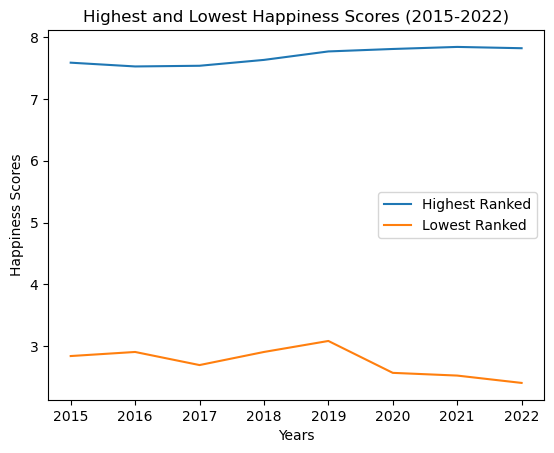

In [53]:
#Create a line chart using data from final_df -Lauren
df = pd.DataFrame({
    'Highest Ranked': [7.5870, 7.5260, 7.5370, 7.6320, 7.7690, 7.8087, 7.8420, 7.8210],
    'Lowest Ranked': [2.8390, 2.9050, 2.6930, 2.9050, 3.0830, 2.5669, 2.5230, 2.4040]
}, index=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
lines = df.plot.line()

plt.title('Highest and Lowest Happiness Scores (2015-2022)')
plt.xlabel('Years')
plt.ylabel('Happiness Scores')



Text(0, 0.5, 'Happiness Score')

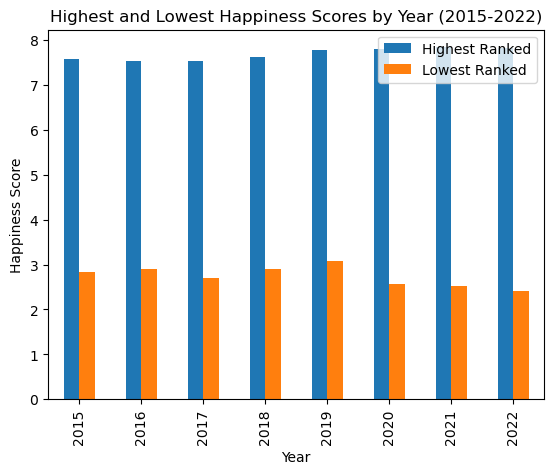

In [54]:
#Create a bar chartusing data from final_df -Lauren
plotdata = pd.DataFrame({
    "Highest Ranked": [7.5870, 7.5260, 7.5370, 7.6320, 7.7690, 7.8087, 7.8420, 7.8210],
    "Lowest Ranked": [2.8390, 2.9050, 2.6930, 2.9050, 3.0830, 2.5669, 2.5230, 2.4040]
    },
    index=["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
)
plotdata.plot(kind="bar")
plt.title("Highest and Lowest Happiness Scores by Year (2015-2022)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
